## Yol Haritası

1. Dataset(Amazon ve Yelpten) içeri aktarılacak
2. sentence and labels olmak üzere liste düzenlenecek
3. tensorflow_dataset ' den SubwordTextEncoder yardımıyla kelimelerin encode edilmesi yapılacak
4. padding ve truncate işlemleri yapılacak
5. train test setleri oluşturulacak
6. standart GlobalAveragePooling1D ile ve EMbedding ile bir model oluşturulacak
7. Görselleştirilip tahmin performansı incelenecek
8. Modeli çift yönlü LSTM kullanarak tekrar oluşturacaz
9. Sonuçtaki değişikleri inceleyecez

##1-İMPORTİNG LİBRARİES

In [3]:
#pandas and numpy
import pandas as pd
import numpy as np

# import pyplot
import matplotlib.pyplot as plt

# import tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# import tfds
import tensorflow_datasets as tfds

##2-Get The Dataset

In [ ]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P -O /tmp/sentiment.csv

In [7]:
dataset = pd.read_csv('/tmp/sentiment.csv')

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

In [8]:
# Bazılarını görelim
for x in range(2):
  print(sentences[x])
  print(labels[x])
  print('\n')

So there is no way for me to plug it in here in the US unless I go by a converter.
0


Good case Excellent value.
1




##3-Create a subwords dataset
 * tensorflow_datasets den SubwordTextEncoder.build_from_corpus() kullanılarak bir tokenize işlemi yapacaz
 * En Yaygın 1000 kelime alınacak(numara verilecek)
 * Bir kelime en fazla 5 alt kelime kesilecek

In [10]:
vocab_size = 1000 # en yaygın 1000 kelime numaralandır

tokenizer  = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences,vocab_size,max_subword_length=5)

# bakalım kaç adet numaralandırma yapmış
print('Vocab size is' , tokenizer.vocab_size)

Vocab size is 999


In [11]:
# encode işlemini kontrol edelim
num = 5
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [12]:
# kodu çözerek alt kelimeleri ayrı ayrı görelim
for i in encoded:
  print(tokenizer.decode([i]))

I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


##4-Replace sentence data with encoded subwords

In [ ]:
# Her Bİr cümleyi kodlamış olduğumuz alt kelimeleri kullanarak encode işlemi yapalım(cümle içindeki kelimeleri değiştirecez)
for i , sentence in enumerate(sentences):
  sentences[i] = tokenizer.encode(sentence)

In [16]:
# Kontrol edelim
print(sentences[10])

[435, 11, 1, 170, 775, 113, 112, 7, 35, 789]


## 5 - Padding_truncate opereations

In [17]:
max_length = 50
trunc_type = 'post'
padding_type = 'post'

# padding and truncating
sequences_padded = pad_sequences(sentences,maxlen = max_length,padding= padding_type,truncating= trunc_type)

##6-Train  Test Sets Create

In [18]:
training_size = int(len(sentences) * 0.8)

training_sequences = sequences_padded[:training_size]
testing_sequences = sequences_padded[training_size:]

training_labels = labels[:training_size]
testing_labels = labels[training_size:]

# Sonrası için numpy dizileri
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

##7- Create First Model With Embeddings

In [19]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [32]:
# model compile and fit

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

num_epoch = 30
history = model.fit(
    training_sequences,
    training_labels_final,
    epochs = num_epoch,
    validation_data = (testing_sequences,testing_labels_final)
)

Epoch 1/30
50/50 [==============================] - 5s 82ms/step - loss: 0.0602 - accuracy: 0.9893 - val_loss: 1.0266 - val_accuracy: 0.7469
Epoch 2/30
50/50 [==============================] - 2s 48ms/step - loss: 0.0567 - accuracy: 0.9887 - val_loss: 1.0452 - val_accuracy: 0.7444
Epoch 3/30
50/50 [==============================] - 4s 77ms/step - loss: 0.0551 - accuracy: 0.9900 - val_loss: 1.0586 - val_accuracy: 0.7419
Epoch 4/30
50/50 [==============================] - 2s 40ms/step - loss: 0.0523 - accuracy: 0.9893 - val_loss: 1.0722 - val_accuracy: 0.7368
Epoch 5/30
50/50 [==============================] - 1s 28ms/step - loss: 0.0529 - accuracy: 0.9900 - val_loss: 1.0938 - val_accuracy: 0.7393
Epoch 6/30
50/50 [==============================] - 1s 18ms/step - loss: 0.0497 - accuracy: 0.9912 - val_loss: 1.1064 - val_accuracy: 0.7393
Epoch 7/30
50/50 [==============================] - 1s 19ms/step - loss: 0.0467 - accuracy: 0.9918 - val_loss: 1.1229 - val_accuracy: 0.7318
Epoch 8/30
50

##8 - Visualize epoch and accuracy

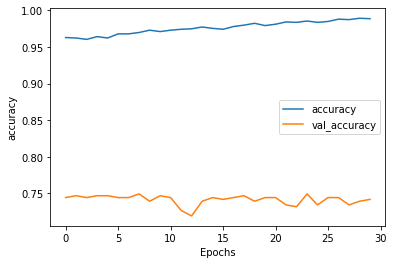

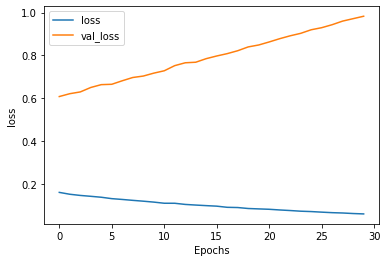

In [23]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

##9-İlerdede kullanmak üzere define a function to predict the sentiment of reviews

In [25]:
def predict_review(model,new_sentences,maxlen = max_length,show_padded_sequences = True):
  
  # kodlanmış verileri saklamak için;
  new_sequences = []

  # gelen cümleyi convert to sequences işlemi 
  for i,new_senten in enumerate(new_sentences):
    new_sequences.append(tokenizer.encode(new_senten))

  # padding and truncate
  new_sequences_padded = pad_sequences(new_sequences,maxlen = max_length,padding='post',truncating = 'post')

  # predict 
  classes = model.predict(new_sequences_padded)

  # Sonucu görmemiz için;
  for x in range(len(new_sentences)): 
    if(show_padded_sequences): 
      print(new_sequences_padded[x]) # istenirse encode halini görebileceğimiz
    print(new_sentences[x])  # istenirse ilk halini görebileceğimiz

    print(classes[x]) # Predict 
    print('\n')


# 10- Use the model predict some reviews

In [27]:
fake_reviews = ["I love this phone", 
                "Everything was cold",
                "Everything was hot exactly as I wanted", 
                "Everything was green", 
                "the host seated us immediately",
                "they gave us free chocolate cake", 
                "we couldn't hear each other talk because of the shouting in the kitchen"
              ]

predict_review(model,fake_reviews,show_padded_sequences=False)

1/1 [==============================] - 0s 41ms/step
I love this phone
[0.9912509]


Everything was cold
[0.00235013]


Everything was hot exactly as I wanted
[0.3266157]


Everything was green
[0.00803414]


the host seated us immediately
[0.97993326]


they gave us free chocolate cake
[0.8903364]


we couldn't hear each other talk because of the shouting in the kitchen
[0.0003157]




##11-Define a function to train and show the results of models with different layers
 * Farklı katmanlara sahip modelleri eğitecez ve görselleştirecez
 * Bunu otomatikleştimek için bir kaç tane fonksiyon tanımlayacaz

In [36]:
# Eğitim için fonksiyon
def fit_model(model,sentences):
  model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
  model.summary()
  history = model.fit(
      training_sequences,
      training_labels_final,
      epochs=num_epoch,
      validation_data = (testing_sequences,testing_labels_final)
  )
  return history


# For the Visualize
def plot_results (history):
  plot_graphs(history, "accuracy")
  plot_graphs(history, "loss")

#İkisini birleştireliö
def fit_model_and_show_results (model, sentences):
  history = fit_model(model, sentences)
  plot_results(history)
  predict_review(model, sentences)

##12-Add a bidirectional LSTM

  * Çift Yönlü model oluşturalım



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 16)            16000     
                                                                 
 bidirectional_6 (Bidirectio  (None, 32)               4224      
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 6)                 198       
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 20,429
Trainable params: 20,429
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 11s 145ms/step - loss: 0.6910 - accuracy: 0.5210 - val_loss: 0.6

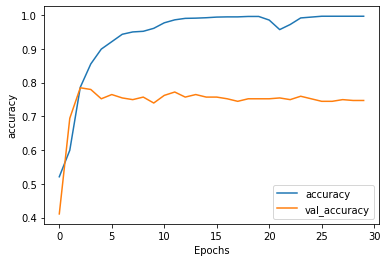

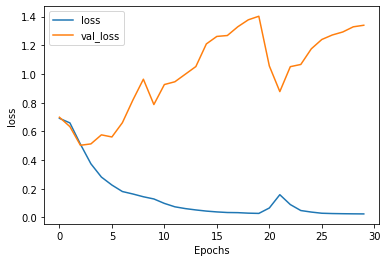

1/1 [==============================] - 1s 598ms/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.99899834]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.0096774]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.5473327]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything 

In [37]:
model_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

fit_model_and_show_results(model_bidi_lstm,fake_reviews)

##13-Use multiple bidirectional layers
  * Çoklu Çift Yönlü LSTM Model oluşturalım

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 50, 16)            16000     
                                                                 
 bidirectional_7 (Bidirectio  (None, 50, 32)           4224      
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 6)                 198       
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 26,701
Trainable params: 26,701
Non-trai

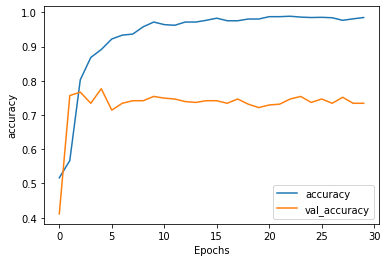

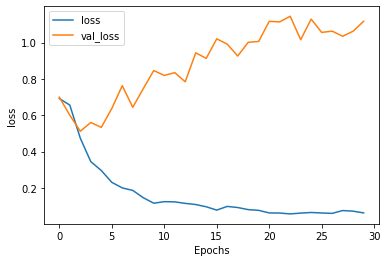

1/1 [==============================] - 1s 1s/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.99694914]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.00469112]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.7228659]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything wa

In [38]:
model_multiple_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
                                                       return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

fit_model_and_show_results(model_multiple_bidi_lstm,fake_reviews)

1. Yerleştirmeler ve Global Ortalama Havuzlama katmanı
2. Gömmeler ve Çift Yönlü LSTM katmanı
3. Gömmeler ve iki Çift Yönlü LSTM katmanı

**1 E YAKINLIK OLUMLU--- 0 A YAKINLIK OLUMSUZ**

PREDİCT COMPARE FOR ALL MODELS

In [39]:
my_reviews =["lovely", "dreadful", "stay away",
             "everything was hot exactly as I wanted",
             "everything was not exactly as I wanted",
             "they gave us free chocolate cake",
             "I've never eaten anything so spicy in my life, my throat burned for hours",
             "for a phone that is as expensive as this one I expect it to be much easier to use than this thing is",
             "we left there very full for a low price so I'd say you just can't go wrong at this place",
             "that place does not have quality meals and it isn't a good place to go for dinner",
             ]

In [41]:
print("===================================\n","Embeddings only:\n", "===================================",)
predict_review(model, my_reviews, show_padded_sequences=False)

 Embeddings only:
1/1 [==============================] - 0s 50ms/step
lovely
[0.9971764]


dreadful
[0.00032222]


stay away
[0.47550952]


everything was hot exactly as I wanted
[0.99407744]


everything was not exactly as I wanted
[0.8929616]


they gave us free chocolate cake
[0.99288756]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.0001602]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.31741396]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.00030668]


that place does not have quality meals and it isn't a good place to go for dinner
[0.98395085]




In [42]:
print("===================================\n", "With a single bidirectional LSTM:\n", "===================================")
predict_review(model_bidi_lstm, my_reviews, show_padded_sequences=False)

 With a single bidirectional LSTM:
1/1 [==============================] - 0s 68ms/step
lovely
[0.99901927]


dreadful
[0.01540251]


stay away
[0.10026204]


everything was hot exactly as I wanted
[0.9668528]


everything was not exactly as I wanted
[0.01259428]


they gave us free chocolate cake
[0.5552742]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.07704324]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.01532]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.99998593]


that place does not have quality meals and it isn't a good place to go for dinner
[0.9955978]




In [43]:
print("===================================\n","With two bidirectional LSTMs:\n", "===================================")
predict_review(model_multiple_bidi_lstm, my_reviews, show_padded_sequences=False)

 With two bidirectional LSTMs:
1/1 [==============================] - 0s 24ms/step
lovely
[0.99729985]


dreadful
[0.00393231]


stay away
[0.01728382]


everything was hot exactly as I wanted
[0.7958087]


everything was not exactly as I wanted
[0.00448225]


they gave us free chocolate cake
[0.9972792]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.0037608]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.14294776]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.0049775]


that place does not have quality meals and it isn't a good place to go for dinner
[0.007601]


